In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

### Загрузим датасет с машинами. Цель - верно восстанавливать для каждой из них цену продажи!

In [2]:
data = pd.read_csv('autos.csv')

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
### Колонка с тергетом - "selling price"

X = data.drop("selling_price", axis=1)
y = data["selling_price"]

### Будем замерять MSLE!
### Поэтому прологарифмируем таргет
### А после оптимизируем MSE

y = y.apply(np.log1p)

In [4]:
### Разделим выборку на трейн и тест!

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

__Задание__ 

Реализуйте свой MeanTargetEncoder с добавленем некоторого шума!

Однажды в лекционном материале, обсуждая счетчики, мы говорили с вами о том, что из-за них модели могут переобучаться. Один из способов бороться с этим - валидировать расчеты среднего таргета (стратегия отложенной выборки / расчеты на кросс-валидации). Но есть еще проще!

Можно просто к значению счетчика добавить случайный шум (зашумить данные)!

Напомним, что рассчитываться новые признаки должны по такой формуле:

$$
g_j = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}{l} + C * \epsilon
$$



Пусть шум будет случайной величиной из нормального стандартного распределения, то есть $\epsilon \sim N(0, 1) $, а $ C = 0.006$.

Создавая свой класс-трансформер, наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`. Трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и список из числовых признаков. 

Если для какого-то признака в тестовой выборке отсутствует значение, трансформер должен поставить там 0.

На выходе должен получиться датасет того же размера с измененными категориальными признаками.

Класс MeanTargetEncoderNoise должен иметь следующую сигнатуру:



from sklearn.base import BaseEstimator, TransformerMixin

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric):              
        ### Your code is here
    
    def fit(self, X, y):
        ### Your code is here

        return self
        
    def transform(self, df):
        ### Your code is here
                
        return temp

Разделите колонки на вещественные и категориальные. Приведите все категориальные колонки к типу `object`.

Далее применим наш кодировщик к `X_train, X_test`, так же как например мы применяем `StandardScaler`, чтобы проверить работоспособность нашего класса. Установите зерно датчика случайный чисел `np.random.seed(1)`.

После того, как вы изменили обучающую и тестовую выборки, сохраните первые 10 строк полученного промежуточного датафрейма обучающей выборки (`X_train`) в файл в формате csv с сепаратором `;`. Не забудьте индекс. Отправьте полученный файл в форму ниже.

Список колонок которые должны быть в файле для сдачи:
```py
cols = [
    "km_driven",
    "name",
    "year",
    "fuel",
    "seller_type",
    "transmission",
    "owner"
]
```

### Ваше решение


Разделение колонок на категориальные и числовые.

In [5]:
object_cols = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner']
num_cols = ['km_driven']

X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


In [6]:
X.dtypes

name            object
year             int64
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
dtype: object

Реализация класса MeanTargetEncoderNoise.

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric, C=0.006):
        """
        Инициализация трансформера.
        """
        ### Your code is here

        self.categorical = categorical
        self.numeric = numeric
        self.C = C
        
        self.mapping = {}
        
    
    def fit(self, X, y):
        """
        Среднее значение таргета для колонки
        """
        ### Your code is here
        X_fit = X.copy()
        y_fit = y.copy()

        for col in self.categorical:
            mean_value = y_fit.groupby(X_fit[col]).mean()

            noise = self.C * np.random.normal(0, 1, size=len(mean_value))
            self.mapping[col] = mean_value + noise

        return self
        
    def transform(self, df):
        """
        Трансформирует категориальные признаки с использованием среднего таргета и шума.
        """
        
        df = df.copy()
        temp = pd.DataFrame()
        
        for col in self.numeric:
            temp[col] = df[col]
            
        for col in self.categorical:
            if col in self.mapping:
                temp[col] = df[col].map(self.mapping[col]).fillna(0)
            else:
                temp[col] = 0

        
        
        return temp

Проверка работы трансформера.

In [8]:
np.random.seed(1)
transformer = MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)

transformer.fit(X_train, y_train)

train = transformer.transform(X_train)
test = transformer.transform(X_test)

train.head(10)

,km_driven,name,year,fuel,seller_type,transmission,owner
3294,50000,13.483692,13.436559,13.093756,12.615863,13.771135,12.977730
2290,70000,12.117029,11.903115,12.453832,12.615863,13.771135,12.977730
874,50000,12.310456,13.328864,12.453832,12.615863,12.639805,12.977730
1907,92198,12.491443,13.042359,12.453832,13.152824,12.639805,12.463313
3244,3240,12.390906,12.870886,12.453832,12.615863,12.639805,12.463313
1089,10000,12.687432,13.436559,12.453832,13.152824,12.639805,12.977730
3902,90000,11.698702,11.503504,12.453832,12.615863,12.639805,11.878390
2215,79000,11.120678,11.503504,12.453832,12.615863,12.639805,12.463313
3862,99700,13.172879,13.328864,13.093756,12.615863,12.639805,12.977730
705,124000,13.004194,12.241213,13.093756,12.615863,12.639805,12.463313


In [9]:
train.head(10).to_csv('transformed_data.csv', sep=';', index=False)

Обучите несколько деревьев, перебирая максимальную глубину алгоритма из списка `max_depth_list`, а остальные параметры оставьте дефолтными. Выведите лучшее значение гиперпараметра. Постройте график зависимости MSLE на тестовой выборке от значения гиперпараметра. Воспользуйтесь `Pipeline` без `GridSearch`. Проделайте то же самое с `min_samples_split`, `min_impurity_decrease`, `max_leaf_nodes`. (по 2б на каждый параметр)

In [10]:
max_depth_list = [3, 5, 8, 12]
min_samples_split_list = [10, 50, 100, 500]
min_impurity_decrease_list = [0, 0.1, 0.15, 0.2]
max_leaf_nodes_list = [100, 200, 500]

При max_depth = 3, msle = 0.7978271003064056
При max_depth = 5, msle = 1.4407231108105145
При max_depth = 8, msle = 1.9873781361756884
При max_depth = 12, msle = 1.9828152222115598


Text(0.5, 1.0, 'График зависимости msle от max depth')

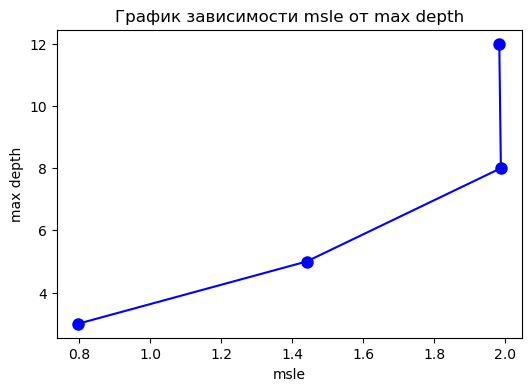

In [11]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

np.random.seed(1)

### Your code is here
max_depth_msle = []
for max_depth in max_depth_list:
    pipe = Pipeline([
        ('castom_transformer', transformer),
        ('decision_tree', DecisionTreeRegressor(max_depth=max_depth))
    ])
    
    pipe.fit(X_train, y_train)

    predict = pipe.predict(X_test)

    msle = mse(y_test, predict)
    max_depth_msle.append(msle)
    print(f'При max_depth = {max_depth}, msle = {msle}')

plt.figure(figsize=(6, 4))

plt.plot(max_depth_msle, max_depth_list, marker='o', color='b', markersize=8)
plt.xlabel('msle')
plt.ylabel('max depth')
plt.title('График зависимости msle от max depth')


При min_samples_split = 10, msle = 1.4307314066133339
При min_samples_split = 50, msle = 1.438270133690429
При min_samples_split = 100, msle = 0.9524464736435937
При min_samples_split = 500, msle = 0.8077891374012307


Text(0.5, 1.0, 'График зависимости msle от min_samples_split')

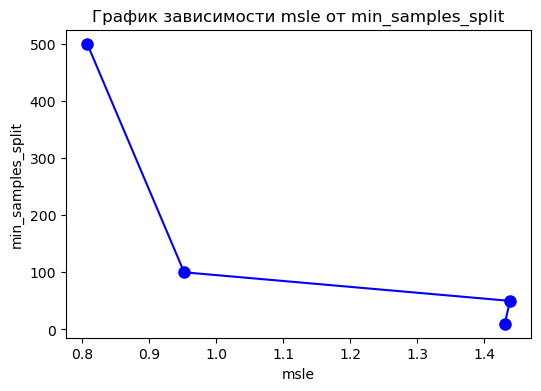

In [16]:
np.random.seed(1)

### Your code is here
min_samples_split_msle = []
for min_samples_split in min_samples_split_list:
    pipe = Pipeline([
        ('castom_transformer', transformer),
        ('decision_tree', DecisionTreeRegressor(min_samples_split=min_samples_split))
    ])
    
    pipe.fit(X_train, y_train)

    predict = pipe.predict(X_test)

    msle = mse(y_test, predict)
    min_samples_split_msle.append(msle)
    print(f'При min_samples_split = {min_samples_split}, msle = {msle}')

plt.figure(figsize=(6, 4))

plt.plot(min_samples_split_msle, min_samples_split_list, marker='o', color='b', markersize=8)
plt.xlabel('msle')
plt.ylabel('min_samples_split')
plt.title('График зависимости msle от min_samples_split')

При min_impurity_decrease = 0, msle = 1.9814229178680083
При min_impurity_decrease = 0.1, msle = 0.5200098587235553
При min_impurity_decrease = 0.15, msle = 0.52000985872357
При min_impurity_decrease = 0.2, msle = 0.5189515041093942


Text(0.5, 1.0, 'График зависимости msle от min_impurity_decreas')

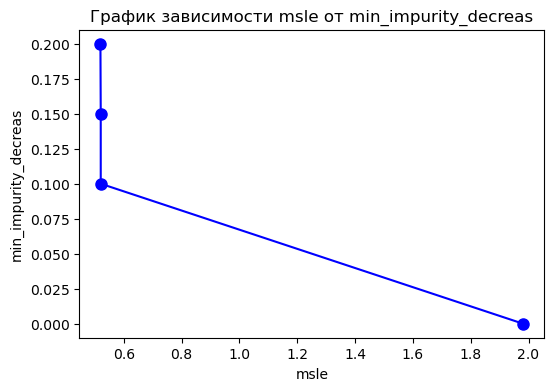

In [17]:
np.random.seed(1)

'''
Если значение min_impurity_decrease установлено больше нуля, то дерево будет продолжать делиться только в том случае, 
если улучшение (снижение неоднородности) по сравнению с предыдущим узлом больше или равно этому значению.
'''

### Your code is here
min_impurity_decrease_msle = []
for min_impurity_decrease in min_impurity_decrease_list:
    pipe = Pipeline([
        ('castom_transformer', transformer),
        ('decision_tree', DecisionTreeRegressor(min_impurity_decrease=min_impurity_decrease))
    ])
    
    pipe.fit(X_train, y_train)

    predict = pipe.predict(X_test)

    msle = mse(y_test, predict)
    min_impurity_decrease_msle.append(msle)
    print(f'При min_impurity_decrease = {min_impurity_decrease}, msle = {msle}')

plt.figure(figsize=(6, 4))

plt.plot(min_impurity_decrease_msle, min_impurity_decrease_list, marker='o', color='b', markersize=8)
plt.xlabel('msle')
plt.ylabel('min_impurity_decreas')
plt.title('График зависимости msle от min_impurity_decreas')

При max_leaf_node = 100, msle = 1.9884077114548684
При max_leaf_node = 200, msle = 1.9842728771306557
При max_leaf_node = 500, msle = 1.980887170190223


Text(0.5, 1.0, 'График зависимости msle от max_leaf_nodes')

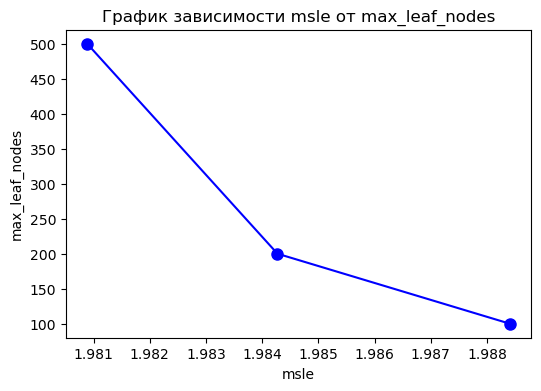

In [14]:
np.random.seed(1)

### Your code is here
max_leaf_nodes_msle = []
for max_leaf_nodes in max_leaf_nodes_list:
    pipe = Pipeline([
        ('castom_transformer', transformer),
        ('decision_tree', DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes))
    ])
    
    pipe.fit(X_train, y_train)

    predict = pipe.predict(X_test)

    msle = mse(y_test, predict)
    max_leaf_nodes_msle.append(msle)
    print(f'При max_leaf_node = {max_leaf_nodes}, msle = {msle}')

plt.figure(figsize=(6, 4))

plt.plot(max_leaf_nodes_msle, max_leaf_nodes_list, marker='o', color='b', markersize=8)
plt.xlabel('msle')
plt.ylabel('max_leaf_nodes')
plt.title('График зависимости msle от max_leaf_nodes')

Из графиков видно, что следующие параметры лучшие: 
1. max_depth = 3
2. max_leaf_node = 500
3. min_impurity_decrease = 0.2
4. max_leaf_node = 500

Подберите лучшую комбинацию параметров, используя `GridSearchCV` и набор массивов значений параметров из предыдущего задания. Для лучшей комбинации посчитайте MSLE на тестовой выборке. Получились ли лучшие параметры такими же, как если бы вы подбирали их по-отдельности при остальных гиперпараметрах по умолчанию (предыдущее задание)? (2б)

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "decision_tree__max_depth": [3, 5, 8, 12],
    "decision_tree__min_samples_split": [10, 50, 100, 500],
    "decision_tree__min_impurity_decrease": [0, 0.1, 0.15, 0.2],
    "decision_tree__max_leaf_nodes": [100, 200, 500]
}
np.random.seed(1)

### Your code is here

pipe = Pipeline([
    ('custom_transformer', transformer),
    ('decision_tree', DecisionTreeRegressor())
])

search = GridSearchCV(pipe,
                     param_grid,
                     scoring='neg_mean_squared_error')

search.fit(X_train, y_train)

best_model = search.best_estimator_
predictions = best_model.predict(X_test)

print(f'Best score on train and params: {search.best_score_} ')
print(search.best_params_)

print(f'Score on test: {mse(y_test, predictions)}')



Best score on train and params: -0.5711538048137028 
{'decision_tree__max_depth': 12, 'decision_tree__max_leaf_nodes': 200, 'decision_tree__min_impurity_decrease': 0.1, 'decision_tree__min_samples_split': 100}
Score on test: 0.5200098587235711
